<a href="https://colab.research.google.com/github/mehdimt1980/Text-Clustering/blob/main/Text_Clustering_on_Hobbes's_Leviathan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

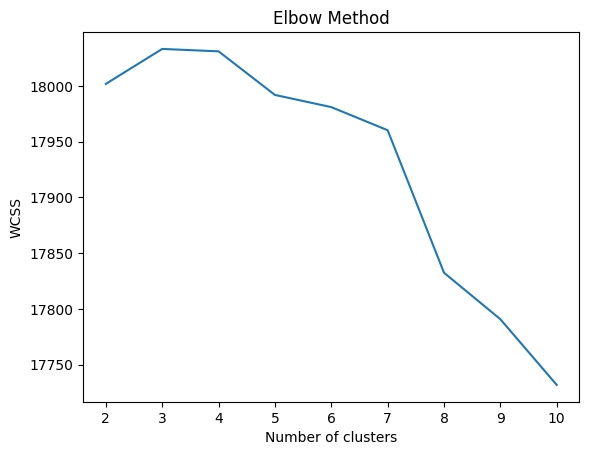

Cluster 0: regeneration | reigning | followed | son | called | preparation | representeth | properly | yee | teaching
Cluster 1: condensed | rarefied | seen | lesse | time | say | greater | event | eve | evangile
Cluster 2: god | man | men | power | law | soveraign | shall | commonwealth | say | hath
Cluster 3: quick | bitten | democraticall | entrance | cease | permanent | refuse | strong | dead | monarchy
Cluster 4: thing | man | right | men | hath | nature | selfe | say | contrary | body
Cluster 5: covenants | voyd | nature | mutuall | author | men | invalid | performance | trust | soveraignty
Cluster 6: act | punishment | hostility | soveraign | voluntary | assembly | present | power | onely | proceed


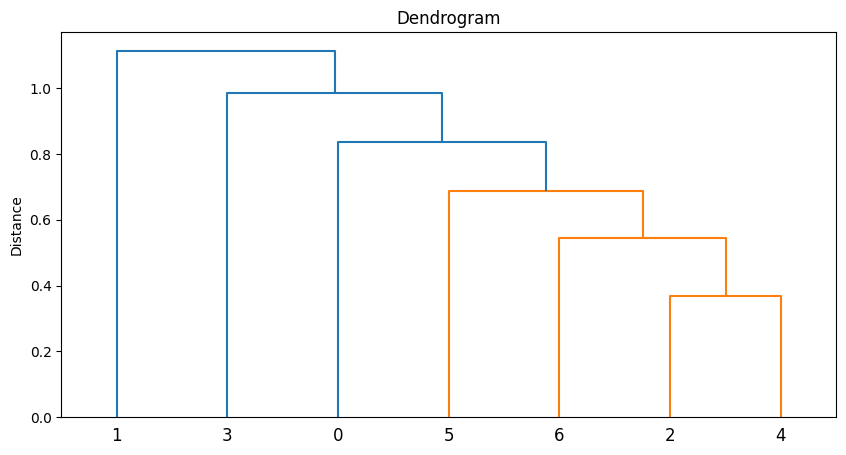

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

# Load the text data from the txt file and convert it into a Pandas dataframe
with open('/content/leviathan.txt', 'r') as file:
    data = file.readlines()

df = pd.DataFrame(data, columns=['text'])

# Create a TfidfVectorizer object to convert the text data into a matrix of TF-IDF values
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(df['text'])

# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init='auto', random_state=42)
    kmeans.fit(tfidf)
    wcss.append(kmeans.inertia_)

plt.plot(range(2, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Fit a KMeans model with the optimal number of clusters determined from the elbow method
num_clusters = 7 # optimal number of clusters determined from elbow method
kmeans = KMeans(n_clusters=num_clusters, init='k-means++', n_init='auto', random_state=42)
kmeans.fit(tfidf)

# Get the top clusters and their corresponding words
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = tfidf_vectorizer.get_feature_names_out()

top_clusters = {}
for i in range(num_clusters):
    cluster_num = i
    words = [terms[ind] for ind in order_centroids[i, :10]]
    top_clusters[cluster_num] = words

# Visualize the top clusters and their words
for cluster_num, words in top_clusters.items():
    print(f'Cluster {cluster_num}: {" | ".join(words)}')

# Visualize the hierarchical distances of each cluster using a dendrogram
Z = linkage(kmeans.cluster_centers_, 'ward')
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title('Dendrogram')
plt.ylabel('Distance')
plt.show()
